Spx is on a low volatility streak, taking a look at how long the streaks usually last and how the current streak relates to past instances. Also looking at Spx returns once the spell breaks - as do probably most others, i expected volatility to pick up, that does not seem to be the case. Bill Luby of Vix And More had a recent post supporting the case for low volatility feeding low volatility on a more long term basis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# https://www.quandl.com/data/YAHOO/INDEX_GSPC-S-P-500-Index
spy = get_pricing(symbols("SPY"), fields=["close_price", "high", "low"],
                  start_date=pd.Timestamp("2002-01-01"), end_date=dt.date.today())

spy = pd.DataFrame(spy, index=spy.index)
spy.rename(columns={"close_price" : "close"}, inplace=True)
spy.drop(["high", "low"], inplace=True, axis=1)
spy.dropna(inplace=True)

def rets(values, shift):
    ret = (values.shift(-shift) / values) - 1
    return ret

spy["pct"] = spy["close"].pct_change()

spy.dropna(inplace=True)

Last time Spx had a daily move of +/-1% or greater was on 12th of december

In [2]:
spy[abs(spy["pct"]) >= 0.01].iloc[-1]

close    239.745000
pct        0.013721
Name: 2017-03-01 00:00:00+00:00, dtype: float64

Lets look at the previous low volatility streaks. Setting up the streak instances count and index

In [3]:
spy_reset = spy.copy().reset_index()
instances = []

start_index = [0]
end_index = [0]
for index, row in spy_reset.iterrows():
    abs_ret = abs(row["pct"])
    
    if abs_ret > 0.01:
        start_index.append(0)
    
    if abs_ret <= 0.01:
        end_index.append(start_index[-1])

    if abs_ret <= 0.01 and abs(spy_reset["pct"]).iloc[index-1] > 0.01:
        start_index.append(index)
    
    instances.append([start_index[-1], row["pct"]])
    
instances_df = pd.DataFrame(instances)
instances_df.columns = ["inst", "pct"]
instances_df = instances_df[instances_df["inst"] != 0]

In [4]:
instances_df

,inst,pct
1,1,0.005576
2,1,-0.006048
3,1,-0.002913
4,1,-0.005674
5,1,0.002246
7,7,-0.005661
8,7,0.006660
10,10,0.009556
11,10,-0.009201
12,10,-0.007336


Looking at all the streak instances, where Spx daily pct moves have been below 1%, this includes moves both up and down. The current streak is nearing previous record (data starts from 2002). In absolute return terms, its rather close to the previous record and the wall of worry seems to have a consistent return angle across all long low volatility streaks

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


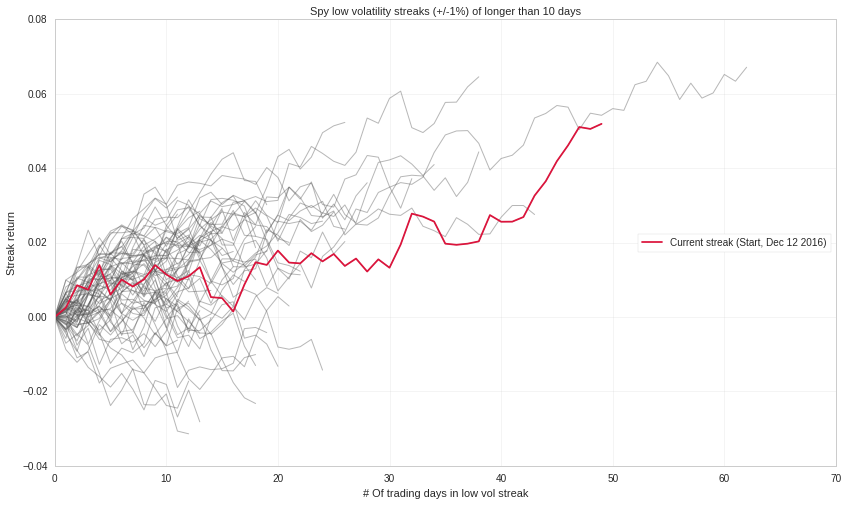

In [102]:
current_run = instances_df.groupby(["inst"]).get_group(3760)
current_run.loc[-1] = [0, 0]
current_run.index = current_run.index + 1
current_run = current_run.sort()
current_run.reset_index(inplace=True)


for index, group in instances_df.groupby(["inst"]):
    if len(group) > 10:
        group.loc[-1] = [0, 0]
        group.index = group.index +1
        group = group.sort()
        group.reset_index(inplace=True)
        plt.plot(group["pct"].cumsum(), color="#555555", alpha=0.42, linewidth=1, label="_nolegend_")
        
plt.plot(current_run["pct"].cumsum(), color="crimson", label="Current streak (Start, Dec 12 2016)")
plt.title("Spy low volatility streaks (+/-1%) of longer than 10 days", fontsize=11)
plt.xlabel("# Of trading days in low vol streak")
plt.ylabel("Streak return")
plt.legend(loc="center right")
plt.grid(alpha=0.21)

Now that the streaks are defined, one can look at the corresponding Spx 3 month forward returns when the spell breaks and Spx gets a move of more that 1% to up or down. I included only performance fo streaks longer than 21 days. I was expecting to see volatility pick up

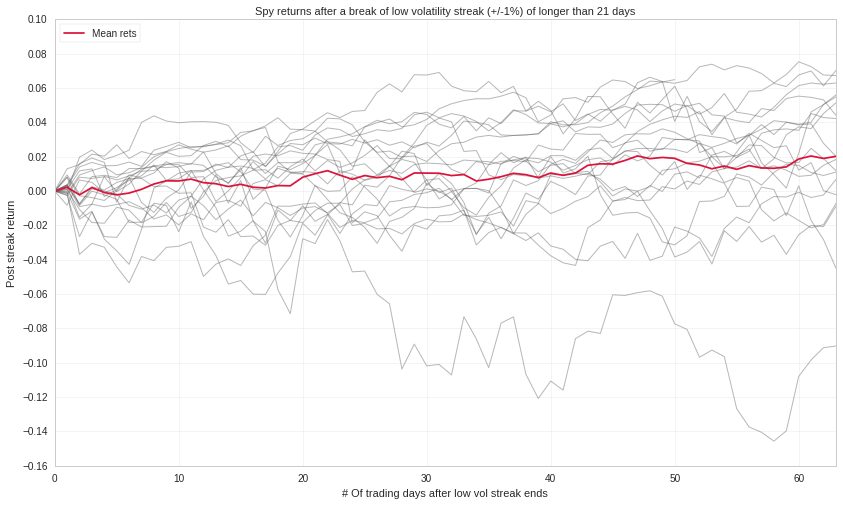

In [104]:
returns_df = spy.copy().reset_index()
returns_df["streak"] = np.array(instances)[:, 0]

returns_n = pd.DataFrame(index=np.arange(0, 100))

for index_g, group in returns_df.groupby(["streak"]):
    if len(group) >= 21:
        index_g = int(group.index[-1])
        out = returns_df.iloc[index_g:index_g+64]
        out = out.reset_index(drop=True)
        #plt.plot(out["pct"].cumsum())
        returns_n[index_g] = out["pct"].cumsum()
        

returns_n.loc[-1, returns_n.columns.values] = 0
returns_n.sort_index(inplace=True)
returns_n.reset_index(drop=True, inplace=True)
returns_n.dropna(how="all", inplace=True)

plt.plot(returns_n, color="#555555", alpha=0.42, linewidth=1, label="_nolegend_")
plt.plot(returns_n.mean(axis=1), color="crimson", label="Mean rets")
plt.title("Spy returns after a break of low volatility streak (+/-1%) of longer than 21 days", fontsize=11)
plt.yticks(np.arange(-0.16, 0.11, 0.02))
plt.xlim(0, 63)
plt.xlabel("# Of trading days after low vol streak ends")
plt.ylabel("Post streak return")
plt.legend(loc="upper left")
plt.grid(alpha=0.21)

Thanks your time and feel free to leave a comment